<a href="https://colab.research.google.com/github/srimayee02/Prediction-of-Emplyee-Attrition/blob/main/Group_2_Prediction_of_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as metrics

Imoprting the libraries that we will use in the project.

In [ ]:
HR = pd.read_csv('/content/HR-Employee-Attrition.csv')
HR

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorking1ears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,0,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,2,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,1,1373,1,2,2,0,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,2,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,1,591,1,2,1,2,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,1,23,2,2,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,1,613,1,6,1,2,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,1,155,1,4,3,1,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,2,1023,0,2,3,2,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [ ]:
HR.shape #number of rows and columns

(1470, 34)

In [ ]:
HR.dtypes #data typs in columns

Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorking1ears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

In [ ]:
HR.isna().sum() #get count of empty values for each column

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorking1ears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

In [ ]:
HR.isnull().values.any() #checking for null values in the data

False

In [ ]:
HR.describe() #stats of the data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorking1ears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.086395,802.485714,0.739456,9.192517,2.912925,1.763946,1.0,1024.865306,2.721769,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,0.532170,403.509100,0.527792,8.106864,1.024165,1.023578,0.0,602.024335,1.093082,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,0.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,1555.750000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,4.000000,1.0,2068.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
HR['Attrition'].value_counts() #count of number of employees that stayed and those who left

0    1233
1     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


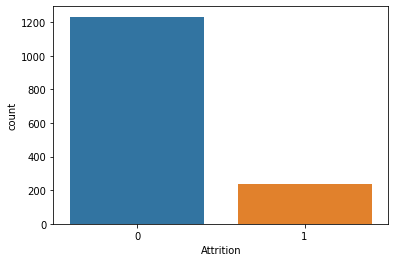

In [ ]:
sns.countplot(HR['Attrition']) #data visualization

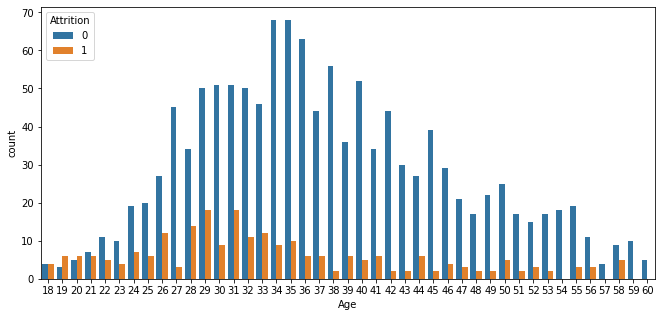

In [ ]:
plt.subplots(figsize = (11,5))
sns.countplot(x = 'Age', hue = 'Attrition', data = HR) #shows employees who left and stayed by age

In [ ]:
(1233-237)/1233 #correct prediction percentage if we just guessed 'NO' = '0' for Attrition

0.8077858880778589

In [ ]:
for column in HR.columns: 
  if HR[column].dtype == object:
    print(str(column)+':'+str(HR[column].unique()))
    print(HR[column].value_counts())
    print('___________________________________________________________________________________') #printing all data types and their unique values

In [ ]:
HR.corr() #obtaining the correlation

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorking1ears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,-0.011807,0.010661,0.031882,-0.001686,0.208034,0.006666,NaN,-0.010145,0.010146,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
BusinessTravel,-0.011807,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.018772,NaN,-0.018538,-0.011310,...,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229,0.127006
DailyRate,0.010661,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.002504,NaN,-0.050990,0.018355,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
Department,0.031882,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.190786,NaN,0.010895,0.019395,...,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282,-0.063991
DistanceFromHome,-0.001686,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.019016,NaN,0.032916,-0.016075,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.008670,-0.016806,-0.007996,0.021042,1.000000,-0.016374,NaN,0.042070,-0.027128,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EducationField,0.006666,-0.018772,-0.002504,-0.190786,0.019016,-0.016374,1.000000,NaN,-0.005466,-0.001549,...,NaN,0.020664,-0.000682,0.018242,0.022729,0.012140,0.011849,0.023146,0.013182,0.079447
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.018538,-0.050990,0.010895,0.032916,0.042070,-0.005466,NaN,1.000000,0.017621,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,-0.011310,0.018355,0.019395,-0.016075,-0.027128,-0.001549,NaN,0.017621,1.000000,...,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369


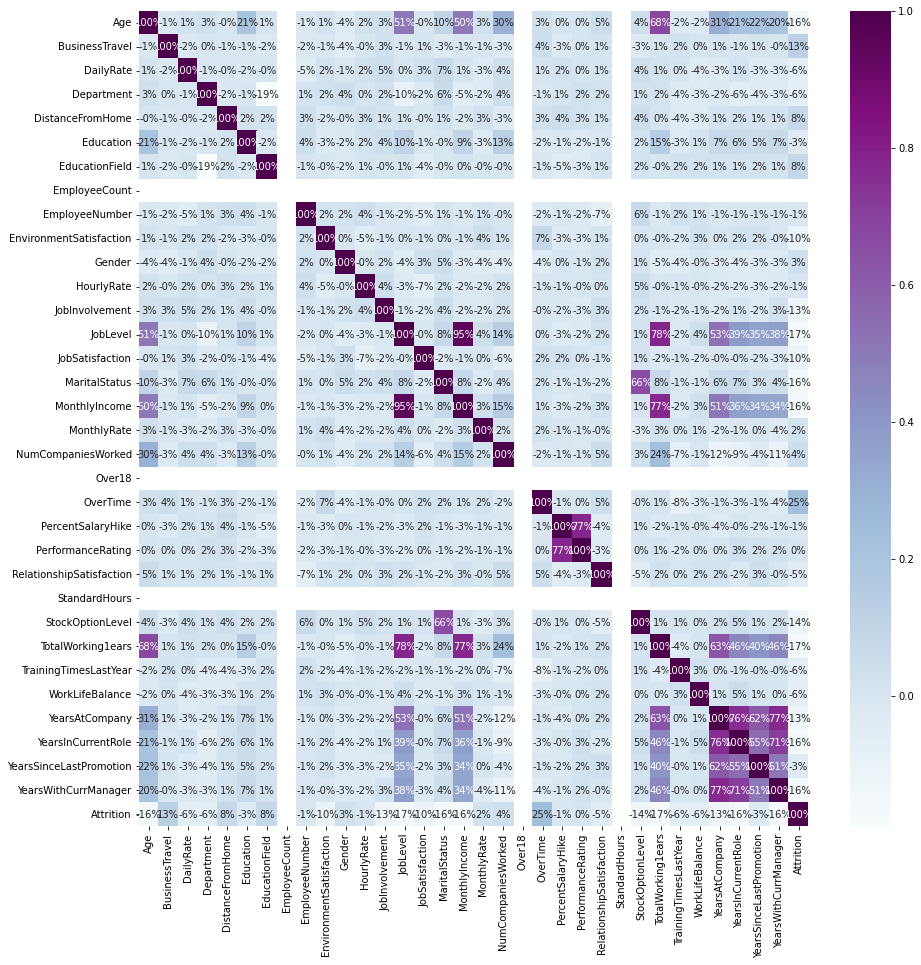

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(HR.corr(), annot=True, fmt = '.0%', cmap="BuPu")
#visualization

In [ ]:
#show the dataframe 
HR

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorking1ears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,0,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,2,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,1,1373,1,2,2,0,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,2,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,1,591,1,2,1,2,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,1,23,2,2,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,1,613,1,6,1,2,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,1,155,1,4,3,1,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,2,1023,0,2,3,2,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [ ]:
X = HR.iloc[:,0:32] #other attributes
Y = HR.iloc[:,33] #target variable: Attrition
#split the data 

Random Forest Classifier Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#split the data into 75% training and 25% testing

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) #measuring of impurity
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#accuracy measurement
forest.score(X_train, Y_train)

0.984573502722323

confusion matrix gives a summary of prediction of results in a classification problem

In [ ]:
#confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, forest.predict(X_test))

tn = cm[0][0]
tp = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]

print('Model Testing Accuracy = {}'.format( (tp + tn)/(tp + tn + fp + fn) ))

Model Testing Accuracy = 0.8559782608695652


In [ ]:
cm = pd.DataFrame(metrics.confusion_matrix(Y_test,forest.predict(X_test)),index=["Attrition: 0","Attrition: 1"],columns=("Predicted: 0","Predicted:1"))
cm

,Predicted: 0,Predicted:1
Attrition: 0,307,3
Attrition: 1,50,8


LDA Model

In [ ]:
#split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.25 , random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_predLDA = LDA.predict(X_test) #pd.DataFrame({"Actual":y_test,"Predicted": y_predLDA})

In [ ]:
# making a prediction
y_predLDA #0 = "NO", 1 = "YES"

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
import sklearn.metrics as metrics
cmatdt = pd.DataFrame(metrics.confusion_matrix(Y_test,y_predLDA),index=["Attrition: 0","Attrition: 1"],columns=("Predicted: 0","Predicted:1"))
cmatdt

,Predicted: 0,Predicted:1
Attrition: 0,301,9
Attrition: 1,32,26


In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score 
ac = accuracy_score(Y_test, y_predLDA)
ac

0.8885869565217391

GAUSSIAN NAIVE BAYES

In [ ]:
HR.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
HR.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,TotalWorking1ears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,0,1,2,1,2,0,94,...,3,1,8,0,1,6,4,0,5,1
1,49,2,279,1,8,1,1,3,1,61,...,4,4,10,3,3,10,7,1,7,0
2,37,1,1373,1,2,2,0,4,1,92,...,3,2,7,3,3,0,0,0,0,1
3,33,2,1392,1,3,4,1,4,0,56,...,3,3,8,3,3,8,7,3,0,0
4,27,1,591,1,2,1,2,1,1,40,...,3,4,6,3,3,2,2,2,2,0


In [ ]:
x = HR.drop(columns='Attrition')

In [ ]:
y = HR['Attrition']

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
model = GaussianNB()
model.fit(X_train, Y_train)
train_Pred = model.predict(X_train)

In [ ]:
metrics.confusion_matrix(Y_train,train_Pred)

array([[809, 114],
       [ 70, 109]])

In [ ]:
metrics.accuracy_score(Y_train,train_Pred)

0.8330308529945554

In [ ]:
test_Pred = model.predict(X_test)

In [ ]:
matrix = pd.DataFrame(metrics.confusion_matrix(Y_test,test_Pred),index=["Attrition: 0","Attrition: 1"],columns=("Predicted: 0","Predicted:1"))
matrix

,Predicted: 0,Predicted:1
Attrition: 0,276,34
Attrition: 1,22,36


In [ ]:
metrics.accuracy_score(Y_test,test_Pred)

0.8478260869565217

K-Nearest Neighbors Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size = 0.25, random_state = 0)

The optimal number of neighbors is  21 


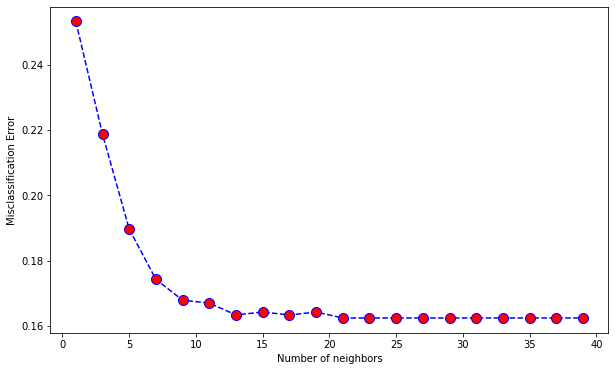

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = []
cv_score = []
   
from sklearn.model_selection import cross_val_score
# perform cross validation: estimation of fitness level of the model
for k in range(1, 40, 2):
    neighbor.append(k)
    KNN = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(KNN, X_train, Y_train, cv = 10, scoring = 'accuracy')
    cv_score.append(score.mean())
error_rate = [1-x for x in cv_score]
   
# determination the best k
optimal_k = neighbor[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)
   
# plot misclassification(percentage of incorrect error) error versus k 
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def print_score(clf, X_train, Y_train, X_test, Y_test, train = True):
	if train:
		print("Train Result:")
		print("------------")
		print("Confusion Matrix: \n")
		matrix_train = pd.DataFrame(metrics.confusion_matrix(Y_train, clf.predict(X_train)),index=["Attrition: 0","Attrition: 1"],columns=("Predicted: 0","Predicted:1"))
		print(matrix_train)
		print("accuracy score: {0:.4f}\n".format(accuracy_score(Y_train, clf.predict(X_train))))

				
	elif train == False:
		print("Test Result:")
		print("-----------")
		matrix_test = pd.DataFrame(metrics.confusion_matrix(Y_test, clf.predict(X_test)),index=["Attrition: 0","Attrition: 1"],columns=("Predicted: 0","Predicted:1"))
		print(matrix_test)
		print("accuracy score: {0:.4f}\n".format(accuracy_score(Y_test, clf.predict(X_test))))
		print("-----------------------------------------------------------")
		
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
print_score(knn, X_train, Y_train, X_test, Y_test, train = True)
print_score(knn, X_train, Y_train, X_test, Y_test, train = False)

Train Result:
------------
Confusion Matrix: 

              Predicted: 0  Predicted:1
Attrition: 0           912           11
Attrition: 1           157           22
accuracy score: 0.8475

Test Result:
-----------
              Predicted: 0  Predicted:1
Attrition: 0           304            6
Attrition: 1            55            3
accuracy score: 0.8342

-----------------------------------------------------------


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}